In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [7]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns = ['labels','data']

In [11]:
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y= df['b_labels'].to_numpy()

In [12]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [15]:
#featurizer = TfidfVectorizer(decode_error='ignore')
#Xtrain = featurizer.fit_transform(df_train)
#Xtest = featurizer.transform(df_test)

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [16]:
Xtrain

<3733x7024 sparse matrix of type '<class 'numpy.int64'>'
	with 49395 stored elements in Compressed Sparse Row format>

In [17]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print('train score:', model.score(Xtrain,Ytrain))
print('test score:', model.score(Xtest,Ytest))

train scorde: 0.993570854540584
test scorde: 0.9869494290375204


In [18]:
def visualize(label):
    words = ''
    
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
        
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

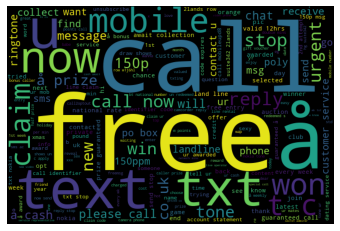

In [19]:
visualize('spam')

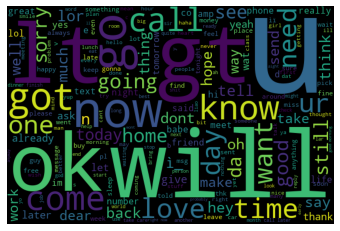

In [20]:
visualize('ham')

In [21]:
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [22]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']

for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Filthy stories and GIRLS waiting for your
Please CALL 08712402779 immediately as there is an urgent message waiting for you
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C 

In [23]:
not_actual_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']

for msg in not_actual_spam:
    print(msg)

Hey company elama po mudyadhu.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
